<a href="https://colab.research.google.com/github/saurabhsangwan/music-genre-classification/blob/main/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Mount Google Drive
# from google.colab import drive # import drive from google colab

# ROOT = "/content/drive"     # default location for the drive
# print(ROOT)                 # print content of ROOT (Optional)

# drive.mount(ROOT)

In [ ]:
# %cd drive/MyDrive/IDS

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import plotly.figure_factory as ff
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import plotly.figure_factory as ff
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
data = pd.read_csv("./data/merged_data.csv")
data.head()

,Unnamed: 0,track_id,genre,title,chroma_cens1,chroma_cens2,chroma_cens3,chroma_cens4,chroma_cens5,chroma_cens6,...,spectral_contrast6,spectral_contrast7,spectral_rolloff1,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,zcr1
0,0,135054,Experimental,Hari Karl (for Larry Eisenberg),0.310373,0.308683,0.290821,0.297749,0.287629,0.260195,...,17.265811,42.597892,2571.502445,-0.002862,-0.000695,0.004706,-0.006419,0.005246,-0.001563,0.070002
1,1,135336,Pop,Slow and Steady,0.161290,0.161296,0.190398,0.171992,0.189878,0.187176,...,20.103589,33.081974,4486.854020,-0.006867,-0.004326,-0.092237,0.019405,-0.006026,0.015697,0.085219
2,2,135337,Pop,The Dream and the Dreamer,0.443386,0.357355,0.191626,0.202726,0.284854,0.236113,...,21.580315,32.187206,4382.598041,0.024635,-0.007949,0.011779,0.130071,0.014134,0.009135,0.108170
3,3,135043,Folk,Babel,0.141946,0.153972,0.169128,0.218597,0.385648,0.400918,...,21.147088,32.537513,4162.319868,0.017150,-0.001607,-0.063755,0.005411,0.006720,-0.011991,0.074080
4,4,135091,Experimental,Tree and Wind,0.017648,0.017463,0.035690,0.158926,0.163426,0.064951,...,19.401185,34.605480,4653.557040,-0.002268,-0.042291,0.160464,-0.144974,0.053375,-0.030622,0.100463


In [3]:
data= data.drop(columns=['Unnamed: 0'])

In [4]:
data.count()

track_id        7997
genre           7997
title           7997
chroma_cens1    7997
chroma_cens2    7997
                ... 
tonnetz3        7997
tonnetz4        7997
tonnetz5        7997
tonnetz6        7997
zcr1            7997
Length: 77, dtype: int64

In [5]:
data.head()

,track_id,genre,title,chroma_cens1,chroma_cens2,chroma_cens3,chroma_cens4,chroma_cens5,chroma_cens6,chroma_cens7,...,spectral_contrast6,spectral_contrast7,spectral_rolloff1,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,zcr1
0,135054,Experimental,Hari Karl (for Larry Eisenberg),0.310373,0.308683,0.290821,0.297749,0.287629,0.260195,0.229743,...,17.265811,42.597892,2571.502445,-0.002862,-0.000695,0.004706,-0.006419,0.005246,-0.001563,0.070002
1,135336,Pop,Slow and Steady,0.161290,0.161296,0.190398,0.171992,0.189878,0.187176,0.231823,...,20.103589,33.081974,4486.854020,-0.006867,-0.004326,-0.092237,0.019405,-0.006026,0.015697,0.085219
2,135337,Pop,The Dream and the Dreamer,0.443386,0.357355,0.191626,0.202726,0.284854,0.236113,0.234724,...,21.580315,32.187206,4382.598041,0.024635,-0.007949,0.011779,0.130071,0.014134,0.009135,0.108170
3,135043,Folk,Babel,0.141946,0.153972,0.169128,0.218597,0.385648,0.400918,0.308826,...,21.147088,32.537513,4162.319868,0.017150,-0.001607,-0.063755,0.005411,0.006720,-0.011991,0.074080
4,135091,Experimental,Tree and Wind,0.017648,0.017463,0.035690,0.158926,0.163426,0.064951,0.212070,...,19.401185,34.605480,4653.557040,-0.002268,-0.042291,0.160464,-0.144974,0.053375,-0.030622,0.100463


In [6]:
#explore data
print(f'Number of variables - {data.shape[1]}\n')
print(f'Data Types for each variable - \n{data.dtypes}\n')
print(f'Number of variables for each data type - \n{data.dtypes.value_counts()}')

Number of variables - 77

Data Types for each variable - 
track_id          int64
genre            object
title            object
chroma_cens1    float64
chroma_cens2    float64
                 ...   
tonnetz3        float64
tonnetz4        float64
tonnetz5        float64
tonnetz6        float64
zcr1            float64
Length: 77, dtype: object

Number of variables for each data type - 
float64    74
object      2
int64       1
dtype: int64


In [7]:
#search missing data
#Counting Null values for each column
null_count = data.isnull().sum()
null_count = null_count[null_count>0]

#Printing null counts for columns that have null count >0
print(f'Null count for Columns - \n{null_count}\n\n')

#Printing % of null counts for columns that have null count>0
for column, null_co in null_count.iteritems():
    print(f'Percentage of missing values for Column {column} - {null_co*100/data.shape[0]:.2f} %')
    if (null_co*100/data.shape[0]) > 0:
      col = column 
      data[data.isnull().any(axis=1)][[col]]

Null count for Columns - 
Series([], dtype: int64)




In [8]:
data = data.dropna()

In [9]:
#Counting Null values for each column
null_count = data.isnull().sum()
null_count = null_count[null_count>0]
print(null_count)

Series([], dtype: int64)


In [10]:
#Checking boolean False counts for each column, an empty/blank string or integer 0 will result in a False value
#for boolean type
bool_counts = data.astype(bool).sum(axis=0)
for col, val in bool_counts.iteritems():
    print(f'{col} Percentage Boolean False Counts {(data.shape[0]-val)*100/data.shape[0]:.2f}')

track_id Percentage Boolean False Counts 0.00
genre Percentage Boolean False Counts 0.00
title Percentage Boolean False Counts 0.00
chroma_cens1 Percentage Boolean False Counts 0.03
chroma_cens2 Percentage Boolean False Counts 0.03
chroma_cens3 Percentage Boolean False Counts 0.03
chroma_cens4 Percentage Boolean False Counts 0.01
chroma_cens5 Percentage Boolean False Counts 0.01
chroma_cens6 Percentage Boolean False Counts 0.03
chroma_cens7 Percentage Boolean False Counts 0.01
chroma_cens8 Percentage Boolean False Counts 0.01
chroma_cens9 Percentage Boolean False Counts 0.01
chroma_cens10 Percentage Boolean False Counts 0.03
chroma_cens11 Percentage Boolean False Counts 0.03
chroma_cens12 Percentage Boolean False Counts 0.03
chroma_cqt1 Percentage Boolean False Counts 0.01
chroma_cqt2 Percentage Boolean False Counts 0.01
chroma_cqt3 Percentage Boolean False Counts 0.01
chroma_cqt4 Percentage Boolean False Counts 0.01
chroma_cqt5 Percentage Boolean False Counts 0.01
chroma_cqt6 Percenta

<AxesSubplot:xlabel='genre', ylabel='count'>

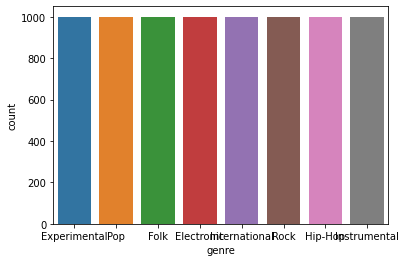

In [11]:
sns.countplot(x = 'genre', data = data)

Partition data

In [12]:
data.count()

track_id        7997
genre           7997
title           7997
chroma_cens1    7997
chroma_cens2    7997
                ... 
tonnetz3        7997
tonnetz4        7997
tonnetz5        7997
tonnetz6        7997
zcr1            7997
Length: 77, dtype: int64

In [13]:
data_new = data.drop(columns=['genre','title', 'track_id'])

In [14]:
#classification data splitting 
X_train,X_test, Y_train, Y_test = train_test_split(data_new.iloc[:,:], data['genre'], test_size = 0.2, random_state=1)

In [15]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6397 entries, 5418 to 5157
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chroma_cens1         6397 non-null   float64
 1   chroma_cens2         6397 non-null   float64
 2   chroma_cens3         6397 non-null   float64
 3   chroma_cens4         6397 non-null   float64
 4   chroma_cens5         6397 non-null   float64
 5   chroma_cens6         6397 non-null   float64
 6   chroma_cens7         6397 non-null   float64
 7   chroma_cens8         6397 non-null   float64
 8   chroma_cens9         6397 non-null   float64
 9   chroma_cens10        6397 non-null   float64
 10  chroma_cens11        6397 non-null   float64
 11  chroma_cens12        6397 non-null   float64
 12  chroma_cqt1          6397 non-null   float64
 13  chroma_cqt2          6397 non-null   float64
 14  chroma_cqt3          6397 non-null   float64
 15  chroma_cqt4          6397 non-null 

In [17]:
# Explore test set
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 4739 to 6011
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chroma_cens1         1600 non-null   float64
 1   chroma_cens2         1600 non-null   float64
 2   chroma_cens3         1600 non-null   float64
 3   chroma_cens4         1600 non-null   float64
 4   chroma_cens5         1600 non-null   float64
 5   chroma_cens6         1600 non-null   float64
 6   chroma_cens7         1600 non-null   float64
 7   chroma_cens8         1600 non-null   float64
 8   chroma_cens9         1600 non-null   float64
 9   chroma_cens10        1600 non-null   float64
 10  chroma_cens11        1600 non-null   float64
 11  chroma_cens12        1600 non-null   float64
 12  chroma_cqt1          1600 non-null   float64
 13  chroma_cqt2          1600 non-null   float64
 14  chroma_cqt3          1600 non-null   float64
 15  chroma_cqt4          1600 non-null 

**Standardize the data**

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
#SelectKBest(f_classif, k=20).fit_transform(X_train, Y_train)
f_classif(X_train_scaled, Y_train)
np.mean(f_classif(X_train_scaled, Y_train)[0])

90.86954950356743

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train_scaled,Y_train)

RandomForestClassifier(n_estimators=200)

In [32]:
Y_pred=clf.predict(X_test_scaled)

In [33]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.191875


In [24]:
clf.feature_importances_

array([0.00965372, 0.00974299, 0.00966478, 0.00980095, 0.0099061 ,
       0.00920994, 0.00963905, 0.00925123, 0.0099263 , 0.00968191,
       0.00971167, 0.00916165, 0.01036284, 0.01058535, 0.00984182,
       0.01061675, 0.01042772, 0.00955916, 0.0101983 , 0.00967755,
       0.01009687, 0.00989642, 0.00999759, 0.00995545, 0.01218817,
       0.01199017, 0.01063671, 0.01302285, 0.01186707, 0.01191829,
       0.01145303, 0.01114634, 0.01260594, 0.01049602, 0.01359741,
       0.0119318 , 0.02482216, 0.02109742, 0.02174282, 0.01704594,
       0.01576947, 0.0123625 , 0.01162175, 0.01309763, 0.01379178,
       0.01234827, 0.01416356, 0.01257409, 0.01442775, 0.01513368,
       0.01788597, 0.01629334, 0.01587594, 0.0130558 , 0.01247122,
       0.01349095, 0.01973707, 0.02449937, 0.02104505, 0.01604332,
       0.02339794, 0.02447709, 0.02179611, 0.02286372, 0.01862362,
       0.01443577, 0.02286513, 0.01176779, 0.01145851, 0.00958718,
       0.01017385, 0.01059146, 0.01074872, 0.01739634])

[[ 13 164   8   2   5   3   8   0]
 [  9 124  19   1  15  11   2   0]
 [  2  86  69   0  34  10   3   0]
 [ 11 182   5   6   4   4   7   0]
 [  3  95  31   2  39  10   4   0]
 [  7 129  16   1  13  26   6   0]
 [  4 148  12   1  17  12   9   0]
 [  2 151  21   0  21   5   8   0]]


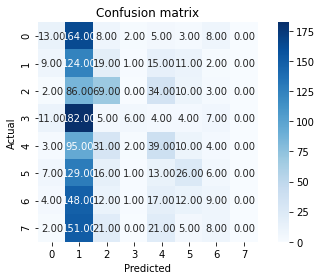

In [25]:
conf_matrix = metrics.confusion_matrix(Y_test,Y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [26]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
error = 1 - accuracy
precision = metrics.precision_score(Y_test, Y_pred, average = None)
recall = metrics.recall_score(Y_test, Y_pred, average = None)
F1_score = metrics.f1_score(Y_test, Y_pred, average = None)
print("Accuracy",accuracy,"\nError", error,"\nPrecision", precision,"\nRecall", recall,"\nF1_score", F1_score)

Accuracy 0.17875 
Error 0.82125 
Precision [0.25490196 0.11492122 0.38121547 0.46153846 0.26351351 0.32098765
 0.19148936 0.        ] 
Recall [0.06403941 0.68508287 0.33823529 0.02739726 0.21195652 0.13131313
 0.04433498 0.        ] 
F1_score [0.1023622  0.1968254  0.35844156 0.05172414 0.23493976 0.18637993
 0.072      0.        ]


/Users/saurabh/PycharmProjects/IDS/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Top features**

Feature ranking:
1. feature 36 (0.026663)
2. feature 57 (0.024747)
3. feature 60 (0.024338)
4. feature 61 (0.023707)
5. feature 63 (0.023334)
6. feature 38 (0.022609)
7. feature 66 (0.022507)
8. feature 58 (0.021945)
9. feature 62 (0.021045)
10. feature 37 (0.019951)
11. feature 56 (0.019120)
12. feature 64 (0.017961)
13. feature 50 (0.017436)
14. feature 73 (0.017359)
15. feature 39 (0.017259)
16. feature 52 (0.016277)
17. feature 59 (0.016038)
18. feature 49 (0.015812)
19. feature 40 (0.015580)
20. feature 51 (0.015165)
21. feature 48 (0.014441)
22. feature 34 (0.014113)
23. feature 46 (0.013853)
24. feature 65 (0.013838)
25. feature 44 (0.013411)
26. feature 55 (0.013402)
27. feature 43 (0.013385)
28. feature 53 (0.013384)
29. feature 27 (0.012806)
30. feature 32 (0.012730)
31. feature 54 (0.012663)
32. feature 41 (0.012623)
33. feature 45 (0.012408)
34. feature 47 (0.012383)
35. feature 28 (0.012320)
36. feature 42 (0.012216)
37. feature 24 (0.011993)
38. feature 25 (0.011914)
39. 

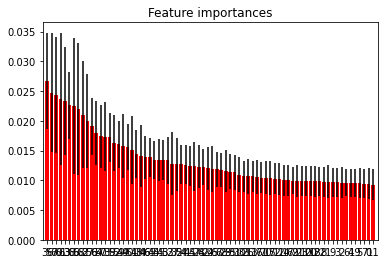

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
# X, y = make_classification(n_samples=1000,
#                            n_features=10,
#                            n_informative=3,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=2,
#                            random_state=0,
#                            shuffle=False)

# Build a forest and compute the impurity-based feature importances
forest = clf=RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train_scaled, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

**Cross validation**

In [34]:
cv_scores_dict = {}
criterion_list = ['gini', 'entropy']
for n_estimators in [100, 200, 300]:
    cv_scores = []
    for criterion in criterion_list:    
        RM_model = RandomForestClassifier(n_estimators = n_estimators, criterion=criterion)
        cv_scores.append(np.mean(cross_val_score(RM_model, X_train_scaled, Y_train, cv=10,n_jobs=-1)))
    max_cv_score = max(cv_scores)
    max_criterion = criterion_list[cv_scores.index(max_cv_score)]
    cv_scores_dict[n_estimators] = {'criterion': max_criterion, 'cv_score': max_cv_score, 'n_estimators': n_estimators}
print(cv_scores_dict)

{100: {'criterion': 'entropy', 'cv_score': 0.47287754303599366, 'n_estimators': 100}, 200: {'criterion': 'entropy', 'cv_score': 0.4783497163536777, 'n_estimators': 200}, 300: {'criterion': 'gini', 'cv_score': 0.4856951780125195, 'n_estimators': 300}}


In [ ]:
#modules for hyperparameter optimization

print(__doc__)
import numpy as np
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier


# build a classifier
clf = RandomForestClassifier(n_estimators=20)

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))

#since the score is null "Nan" is treated as string and hence error below

        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters space
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train_scaled, Y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)
#print(random.parameters)

Automatically created module for IPython interactive environment
